<a href="https://colab.research.google.com/github/hmyrcmn/MachinaLearning/blob/main/TrendAnalize2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import random
import pandas as pd

# Rastgele tarihler oluşturun
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Veri seti için boş bir DataFrame oluşturun
data = pd.DataFrame({'Tarih': date_range})

# Hava sensörleri için rastgele verileri doldurun (0 ile 5 arasında rastgele hava basıncı değerleri)
for i in range(1, 7):
    sensor_name = f'Sensor_{i}'
    data[sensor_name] = [random.uniform(0, 5) for _ in range(len(date_range))]

# Event sütununu rastgele 0 veya 1 olarak ata
data['Event'] = [random.randint(0, 1) for _ in range(len(date_range))]

# Tarih sütununu saniye cinsinden dönüştürün
data['Zaman_Saniye'] = (data['Tarih'] - data['Tarih'].min()).dt.total_seconds()

# Veri setini CSV dosyasına kaydetme
data.to_csv('data.csv', index=False)


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv('data.csv')
print(data.head())



                 Tarih  Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  \
0  2023-01-01 00:00:00  1.067316  1.100811  3.010467  3.627449  3.043056   
1  2023-01-01 01:00:00  0.605152  0.571525  2.513618  2.242545  2.618945   
2  2023-01-01 02:00:00  1.756520  2.627731  4.168604  4.005186  3.844577   
3  2023-01-01 03:00:00  3.521046  0.751255  3.368220  0.467862  2.968396   
4  2023-01-01 04:00:00  0.761430  4.713160  0.770957  4.283533  2.431103   

   Sensor_6  Event  Zaman_Saniye  
0  0.580888      1           0.0  
1  1.505408      0        3600.0  
2  1.712444      1        7200.0  
3  4.598594      0       10800.0  
4  3.432235      1       14400.0  


In [24]:
data.tail()

,Tarih,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Event,Zaman_Saniye
8732,2023-12-30 20:00:00,2.532300,1.879163,1.285938,3.287423,3.922794,0.649679,0,31435200.0
8733,2023-12-30 21:00:00,3.440364,0.169367,1.088852,3.922697,2.259556,2.669652,0,31438800.0
8734,2023-12-30 22:00:00,0.676842,4.599284,4.637104,0.095466,1.206850,0.618922,1,31442400.0
8735,2023-12-30 23:00:00,4.704822,1.504540,4.235887,4.250149,4.892479,3.920257,1,31446000.0
8736,2023-12-31 00:00:00,0.853516,1.761875,0.117976,1.597588,1.113987,2.789975,0,31449600.0


In [25]:
# Tarih sütununu 'tarih' olarak değiştirin
data['Tarih'] = pd.to_datetime(data['Tarih'])
data['Tarih'] = data['Tarih'].astype(int)

In [26]:
data.tail()

,Tarih,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Event,Zaman_Saniye
8732,1703966400000000000,2.532300,1.879163,1.285938,3.287423,3.922794,0.649679,0,31435200.0
8733,1703970000000000000,3.440364,0.169367,1.088852,3.922697,2.259556,2.669652,0,31438800.0
8734,1703973600000000000,0.676842,4.599284,4.637104,0.095466,1.206850,0.618922,1,31442400.0
8735,1703977200000000000,4.704822,1.504540,4.235887,4.250149,4.892479,3.920257,1,31446000.0
8736,1703980800000000000,0.853516,1.761875,0.117976,1.597588,1.113987,2.789975,0,31449600.0


Epoch 1/50
175/175 [==============================] - 4s 11ms/step - loss: 0.0469 - val_loss: 0.1206
Epoch 2/50
175/175 [==============================] - 1s 7ms/step - loss: 0.0246 - val_loss: 0.0735
Epoch 3/50
175/175 [==============================] - 2s 9ms/step - loss: 0.0146 - val_loss: 0.0280
Epoch 4/50
175/175 [==============================] - 2s 11ms/step - loss: 0.0074 - val_loss: 0.0114
Epoch 5/50
175/175 [==============================] - 2s 11ms/step - loss: 0.0057 - val_loss: 0.0179
Epoch 6/50
175/175 [==============================] - 2s 9ms/step - loss: 0.0044 - val_loss: 0.0281
Epoch 7/50
175/175 [==============================] - 1s 7ms/step - loss: 0.0037 - val_loss: 0.0148
Epoch 8/50
175/175 [==============================] - 1s 7ms/step - loss: 0.0035 - val_loss: 0.0159
Epoch 9/50
175/175 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0107
Epoch 10/50
175/175 [==============================] - 1s 7ms/step - loss: 0.0021 - val_loss: 0.0

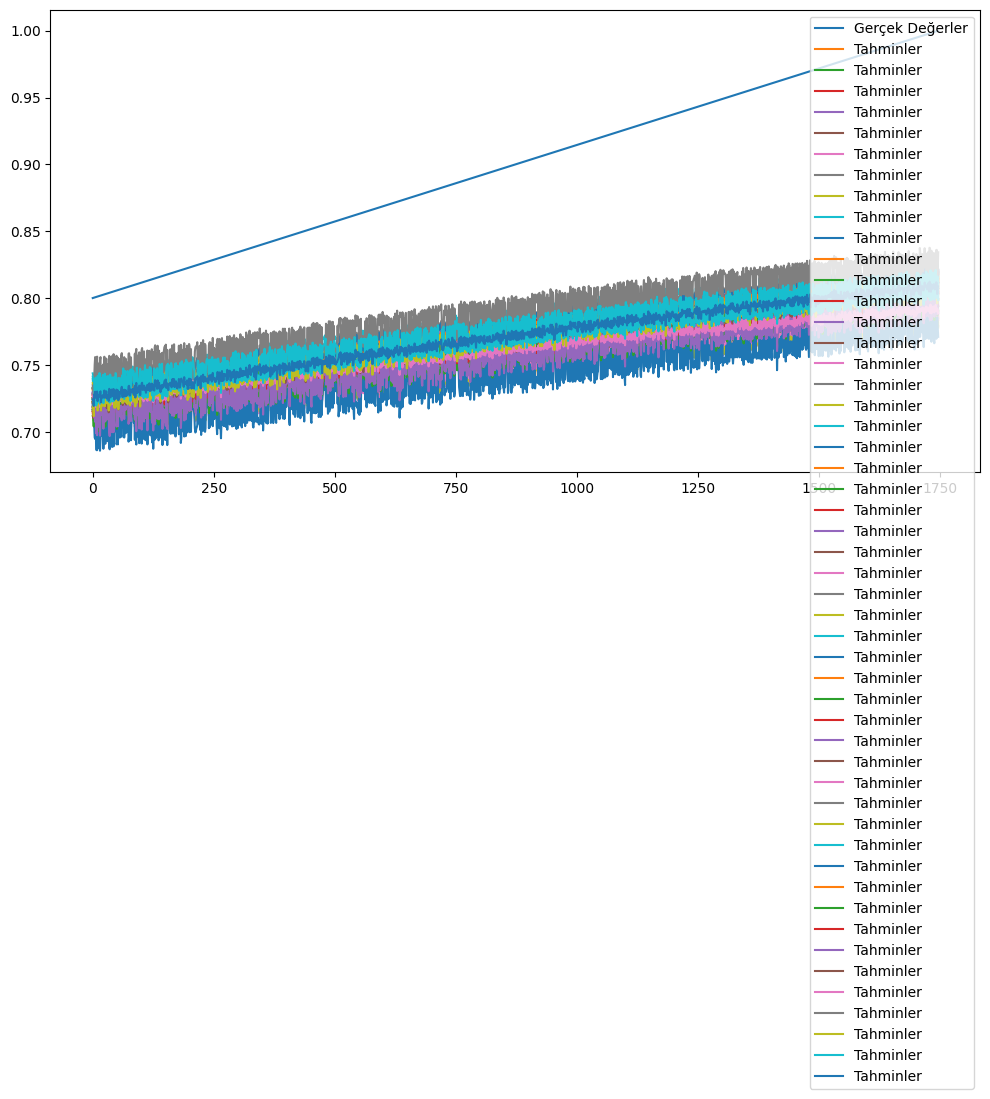

In [27]:
# Veriyi ölçeklendirme (MinMaxScaler kullanarak)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Veriyi eğitim ve test kümelerine bölme
X = scaled_data[:, :-1]  # Özellikler
y = scaled_data[:, -1]   # Etiketler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
#model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Tahminler yapma
y_pred = model.predict(X_test)

# Tahminleri ve gerçek değerleri grafikleştirme
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek Değerler')
plt.plot(y_pred, label='Tahminler')
plt.legend()
plt.show()

Epoch 1/50
134/134 [==============================] - 5s 13ms/step - loss: 0.0216 - val_loss: 0.1220
Epoch 2/50
134/134 [==============================] - 1s 8ms/step - loss: 0.0179 - val_loss: 0.0701
Epoch 3/50
134/134 [==============================] - 1s 8ms/step - loss: 0.0131 - val_loss: 0.0470
Epoch 4/50
134/134 [==============================] - 1s 8ms/step - loss: 0.0072 - val_loss: 0.0138
Epoch 5/50
134/134 [==============================] - 1s 8ms/step - loss: 0.0046 - val_loss: 0.0373
Epoch 6/50
134/134 [==============================] - 1s 8ms/step - loss: 0.0041 - val_loss: 0.0109
Epoch 7/50
134/134 [==============================] - 2s 12ms/step - loss: 0.0035 - val_loss: 0.0090
Epoch 8/50
134/134 [==============================] - 2s 12ms/step - loss: 0.0025 - val_loss: 0.0142
Epoch 9/50
134/134 [==============================] - 2s 13ms/step - loss: 0.0026 - val_loss: 0.0069
Epoch 10/50
134/134 [==============================] - 1s 10ms/step - loss: 0.0021 - val_loss: 0

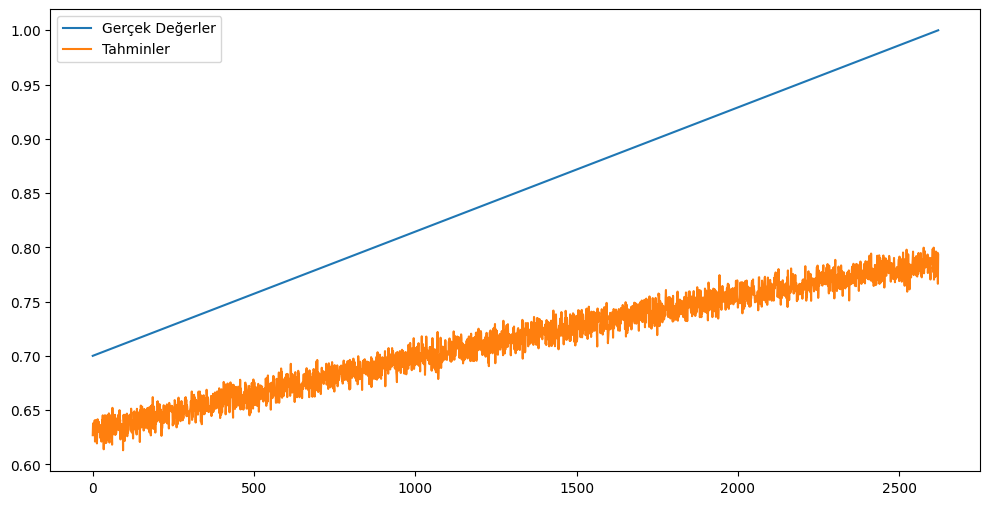

In [28]:
# Veriyi ölçeklendirme (MinMaxScaler kullanarak)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Veriyi eğitim ve test kümelerine bölme
X = scaled_data[:, :-1]  # Özellikler
y = scaled_data[:, -1]   # Etiketler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

# Tahminler yapma
y_pred = model.predict(X_test)

# Tahminleri ve gerçek değerleri grafikleştirme
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Gerçek Değerler')
plt.plot(y_pred, label='Tahminler')
plt.legend()
plt.show()